In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np
from google.colab import files
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
base_path = 'drive/My Drive/Extra/Q2/data/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 16
train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

Found 480 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model = Sequential()

input_shape = (224,224,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.001

model = Sequential()

model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=8, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))


model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))


model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))



model.add(GlobalAveragePooling2D())

model.add(Dense(1, activation='sigmoid'))

model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 8)      0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 8)      32        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      1168      
                                                      

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
from tensorflow.keras.optimizers import RMSprop,SGD,Adam,Adadelta



model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])


train_steps = 480//batch_size
valid_steps = 120//batch_size
history = model.fit(
    train_flow,
    epochs=25,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)



Epoch 1/25
30/30 [==============================] - 289s 10s/step - loss: 0.5782 - accuracy: 0.6458 - val_loss: 0.6965 - val_accuracy: 0.4821
Epoch 2/25
30/30 [==============================] - 4s 128ms/step - loss: 0.4362 - accuracy: 0.8042 - val_loss: 0.6868 - val_accuracy: 0.5089
Epoch 3/25
30/30 [==============================] - 4s 128ms/step - loss: 0.3832 - accuracy: 0.8417 - val_loss: 0.6713 - val_accuracy: 0.5804
Epoch 4/25
30/30 [==============================] - 4s 128ms/step - loss: 0.3689 - accuracy: 0.8417 - val_loss: 0.6494 - val_accuracy: 0.6696
Epoch 5/25
30/30 [==============================] - 4s 126ms/step - loss: 0.3635 - accuracy: 0.8479 - val_loss: 0.6380 - val_accuracy: 0.5893
Epoch 6/25
30/30 [==============================] - 4s 124ms/step - loss: 0.3449 - accuracy: 0.8729 - val_loss: 0.6223 - val_accuracy: 0.5625
Epoch 7/25
30/30 [==============================] - 4s 127ms/step - loss: 0.3430 - accuracy: 0.8604 - val_loss: 0.6284 - val_accuracy: 0.5536
Epoch 

In [ ]:
history.history

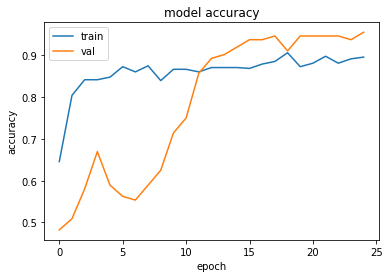

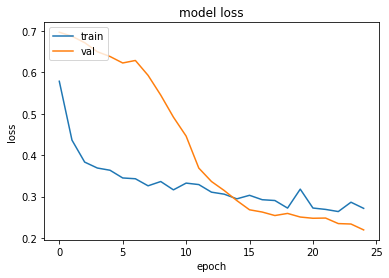

In [ ]:

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()